In [1]:
import torch
import torchvision
from model import Model
from utils import get_rep, cumulate_reps, plot_rep

In [2]:
model = Model(num_rep=8, num_hidden=15)
model_state_dicts = torch.load("models/model.pt")

In [3]:
epoch_reps = []
for weights in model_state_dicts:
    model.load_state_dict(weights)
    rep = get_rep(model)
    epoch_reps.append(rep)
    

In [4]:
[rep1, rep2, rep3, rep4, rep5], names = cumulate_reps(epoch_reps)

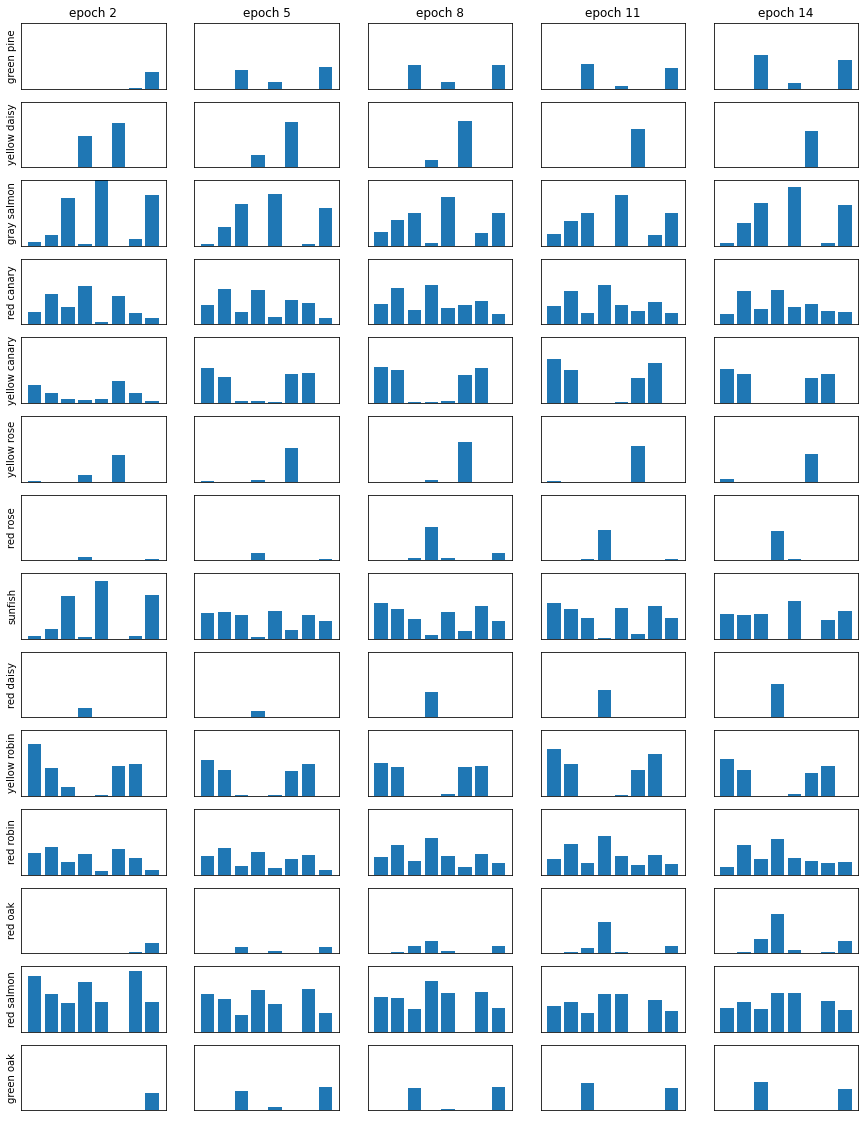

In [5]:
plot_rep(rep1, rep2, rep3, rep4, rep5, names)